### Data

https://github.com/rfordatascience/tidytuesday/tree/master/data/2018/2018-10-16

### Dataset Dictionary

- **Rank** Rank by median earnings
- **Major_code** Major code, FO1DP in ACS PUMS
- **Major** Major description
- **Major_category** Category of major from Carnevale et al
- **Total** Total number of people with major
- **Sample_size** Sample size (unweighted) of full-time, year-round ONLY (used for earnings)
- **Men** Male graduates
- **Women** Female graduates
- **ShareWomen** Women as share of total
- **Employed** Number employed (ESR == 1 or 2)
- **Full_time** Employed 35 hours or more
- **Part_time** Employed less than 35 hours
- **Full_time_year_round** Employed at least 50 weeks (WKW == 1) and at least 35 hours (WKHP >= 35)
- **Unemployed** Number unemployed (ESR == 3)
- **Unemployment_rate** Unemployed / (Unemployed + Employed)
- **Median** Median earnings of full-time, year-round workers
- **P25th** 25th percentile of earnigns
- **P75th** 75th percentile of earnings
- **College_jobs** Number with job requiring a college degree
- **Non_college_jobs** Number with job not requiring a college degree
- **Low_wage_jobs** Number in low-wage service jobs

In [1]:
import pandas as pd 

In [6]:
pd.options.plotting.backend = "plotly"

In [2]:
df = pd.read_csv('recent-grads.csv')
df

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308


### Анализ: что будем изучать

**Сначала посмотрим на датасет**

1. самые популярные направления, судя по Total
2. общее количество мужчин и женщин, идущих в университеты

**А потом проверим следующие гипотезы, подкрепив результаты визуализацией:**

- ...
- ...

3. распределение полов по направлениям
4. средние зарплаты по направлениям
5. зарплата женщин и мужчин
6. средняя безработица по направлениям
7. топ областей с низкооплачиваемой работой
8. топ направлениях, в которых есть работа без необходимости диплома

In [ ]:
!pip install -U plotly

In [7]:
pip install chart_studio

Note: you may need to restart the kernel to use updated packages.


In [8]:
import chart_studio.plotly as py
import cufflinks as cf
import seaborn as sns
import plotly.express as px
%matplotlib inline

# Make Plotly work in your Jupyter Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()

# 1

In [9]:
# количество программ в зависимости от направления (кол-во ОП на факультетах) и количество 

In [10]:
df_majors = df['Major_category']
fig = px.pie(df_majors, names='Major_category', title='Which major has the widest selection of programs?', color='Major_category')
fig.show()

In [11]:
# распределение программ по количеству студентов

In [12]:
majors = df.dropna().groupby(['Major_category']).agg({'Total':'sum'})
fig2 = px.pie(df, values='Total', names='Major_category', title='Which program is most often chosen by students?', color='Major_category')
fig2.show()

# 2

In [20]:
# общее количество мужчин и женщин

print(df['Men'].sum())
print(df['Women'].sum())

2876426.0
3895228.0


# 3

In [13]:
major_by_gender = pd.pivot_table(df, index="Major_category", values=["Men", "Women"])
major_by_gender

,Men,Women
Major_category,,
Agriculture & Natural Resources,4484.111111,3918.111111
Arts,16798.750000,27842.500000
Biology & Life Science,13208.500000,19210.214286
Business,51373.230769,48809.538462
Communications & Journalism,32980.250000,65170.000000
Computers & Mathematics,18975.000000,8207.545455
Education,6470.375000,28475.187500
Engineering,14079.551724,4457.793103
Health,6293.083333,32309.416667


In [14]:
# распределение полов по направлениям

test = px.bar(major_by_gender, title='Sexes distribution depending on the major category')
test.show()

# 4

In [15]:
# Total это количество челов которые учатся на направлении

fig = px.scatter(df, x="Total", y="Median",
                 size="Median", color="Major_category",
                 hover_name="Major", log_x=True, size_max=30, title='Distribution of salaries depending on the major')
fig.show()

In [4]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

<AxesSubplot:title={'center':'Median salary depending on the major category'}, ylabel='major category'>

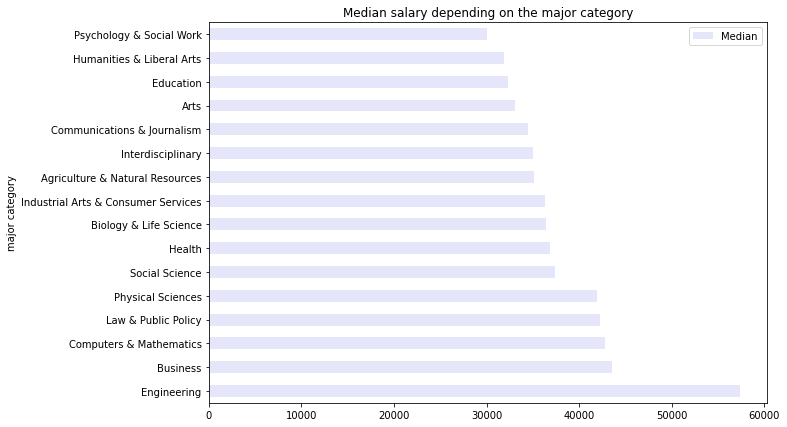

In [5]:
# график Ани

df = df.dropna()
df2 = df.dropna(subset=["Major_category"])
df3 = df2.groupby(['Major_category'])
df_sal = df3.agg({"Median": "mean"})
df_sal_sorted = df_sal.sort_values('Median', ascending = False)
df_sal_sorted.plot.barh(title = 'Median salary depending on the major category', ylabel = 'median salary', 
             xlabel = 'major category', color = 'lavender', figsize = (10,7))

# 5

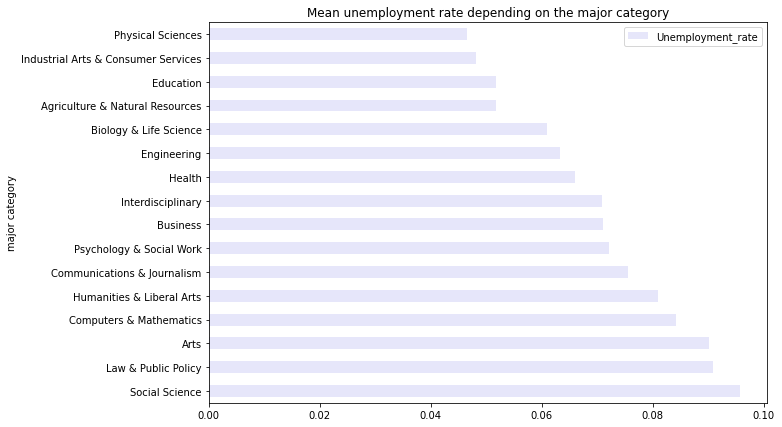

In [5]:
# график Ани

df_empl = df3.agg({"Unemployment_rate": "mean"})
df_empl_sorted = df_empl.sort_values('Unemployment_rate', ascending = False)
df_empl_sorted.plot.barh(title = 'Mean unemployment rate depending on the major category', ylabel = 'mean unemployment rate', 
             xlabel = 'major category', color = 'lavender', figsize = (10,7))


# 7

In [6]:
df_jobs = df[['Major_category', 'Employed', 'Low_wage_jobs']]
employed = df2["Employed"]
low_wage = df2["Low_wage_jobs"]
l_emp = []
l_wage = []
for i in employed.items():
    l_emp.append(i[1])
for i in low_wage.items():
    l_wage.append(i[1])
l_perc = []
for i in range(len(l_wage)):
    if l_wage[i] != 0:
        l_perc.append(round(l_wage[i]/l_emp[i], 2))
    else:
        l_perc.append(0)

In [7]:
df_with_jobs = df.insert(21, 'Percent_of_low_wages', l_perc)

In [8]:
df_copy = df
#df_copy.insert(21, 'Percent_of_low_wages', l_perc)
#df_copy

In [9]:
lw = df_copy.dropna(subset=["Major_category"]).groupby(['Major_category']).agg({"Percent_of_low_wages": "mean"})
lw_sorted = lw.sort_values('Percent_of_low_wages', ascending = False)

In [10]:
lw_top = lw_sorted.head(5)
lw_top

,Percent_of_low_wages
Major_category,
Arts,0.226250
Humanities & Liberal Arts,0.176000
Social Science,0.151111
Communications & Journalism,0.147500
Psychology & Social Work,0.126667


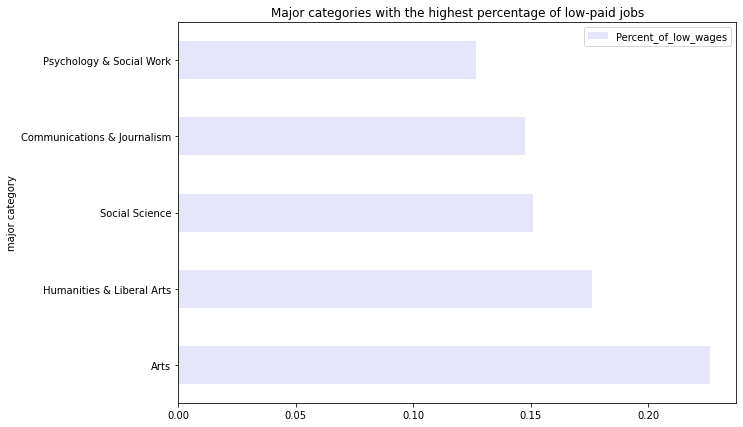

In [11]:
lw_top.plot.barh(title = 'Major categories with the highest percentage of low-paid jobs', ylabel = 'percentage of low-paid jobs', 
             xlabel = 'major category', color = 'lavender', figsize = (10,7))

# 8

In [ ]:
# топ направлениях, в которых есть работа без необходимости диплома

In [31]:
non_col_jobs = df[df['College_jobs'] < df['Non_college_jobs']]
non_col_jobs[['Major_category', 'Non_college']]

KeyError: "['Non_college'] not in index"

In [20]:
fig = px.pie(non_col_jobs, names='Major_category', title='')
fig.show()

In [29]:
col_jobs = df[df['College_jobs'] > df['Non_college_jobs']]
col_jobs[['Major_category', 'College_jobs']]

,Major_category,College_jobs
0,Engineering,1534
1,Engineering,350
2,Engineering,456
3,Engineering,529
4,Engineering,18314
...,...,...
163,Health,19957
164,Education,23515
169,Psychology & Social Work,1488
170,Psychology & Social Work,986


In [30]:
fig = px.pie(col_jobs, names='Major_category', title='')
fig.show()